In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from pathlib import Path
import time
import os
import cv2
from sklearn.model_selection import train_test_split

In [4]:
data_dir = "/kaggle/input/handwritten-math-symbols/dataset"
os.listdir(data_dir)

['7',
 '2',
 '5',
 'div',
 '8',
 'x',
 '0',
 'y',
 'z',
 'add',
 '3',
 'eq',
 'dec',
 'sub',
 '1',
 '4',
 '9',
 'mul',
 '6',
 '.directory']

In [5]:
batch_size = 128
img_row = 28
img_col = 28
channel = 1

In [6]:
labels = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'add': 10, 'dec': 11, 'div': 12, 'eq': 13, 'mul': 14, 'sub': 15, 'x':16, 'y': 17, 'z': 18, '[': 19, ']': 20}

label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z', '[', ']']

num_classes = 21

In [137]:
labels = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'add': 10, 'dec': 11, 'div': 12, 'eq': 13, 'mul': 14, 'sub': 15, 'x':16, 'y': 17, 'z': 18, '[': 19, ']': 20}
labels = {'%': 0, '*': 1, '+': 2, '-': 3, '0': 4, '1': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13, '[': 14, ']': 15, "dec": 16, "eq": 17, "x": 18, "y": 19, "z": 20, "add": 2, "sub": 3, "mul": 1, "div": 0}
# label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z', '[', ']']
label = list(labels.keys())[:-4]

num_classes = 21
print("Labels dict: ", labels)
print("Labels list: ", label)
print("Num of classes: ", num_classes)

Labels dict:  {'%': 0, '*': 1, '+': 2, '-': 3, '0': 4, '1': 5, '2': 6, '3': 7, '4': 8, '5': 9, '6': 10, '7': 11, '8': 12, '9': 13, '[': 14, ']': 15, 'dec': 16, 'eq': 17, 'x': 18, 'y': 19, 'z': 20, 'add': 2, 'sub': 3, 'mul': 1, 'div': 0}
Labels list:  ['%', '*', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '[', ']', 'dec', 'eq', 'x', 'y', 'z']
Num of classes:  21


In [138]:
def get_image_4(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
#     img = ~img
#     _, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

#     im_crop = thresh[:, :]
#     im_resize = cv2.resize(im_crop,(28,28))
    im_resize = cv2.resize(img,(28,28))
    im_resize = np.reshape(im_resize,(784))
    return im_resize

In [139]:
def get_image_3(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = ~img
#     _, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

#     im_crop = thresh[:, :]
#     im_resize = cv2.resize(im_crop,(28,28))
    im_resize = cv2.resize(img,(28,28))
    im_resize = np.reshape(im_resize,(784))
    return im_resize

In [140]:
def get_image_2(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = ~img
    _, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#     contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
#     contour = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[0])

#     a = int(28)
#     b = int(28)
#     maxi = 0
    
#     for c in contour:
#         x,y,a,b=cv2.boundingRect(c)
        
#         maxi=max(a*b,maxi)
#         if maxi==a*b:
#             x_max=x
#             y_max=y
#             w_max=a
#             h_max=b

    im_crop = thresh[:, :]
    im_resize = cv2.resize(im_crop,(28,28))
#     im_resize = cv2.resize(img,(28,28))
#     cv2.rectangle(img, (x_max, y_max), (x_max + w_max, y_max + h_max), (0, 255, 0), 2)
#     plt.imshow(img)
    im_resize = np.reshape(im_resize,(784))
    return im_resize

In [141]:
def get_image(file):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = ~img
    _, thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contour = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[0])

    a = int(28)
    b = int(28)
    maxi = 0
    
    for c in contour:
        x,y,a,b=cv2.boundingRect(c)
        
        maxi=max(a*b,maxi)
        if maxi==a*b:
            x_max=x
            y_max=y
            w_max=a
            h_max=b

    im_crop = thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
    im_resize = cv2.resize(im_crop,(28,28))
#     cv2.rectangle(img, (x_max, y_max), (x_max + w_max, y_max + h_max), (0, 255, 0), 2)
#     plt.imshow(img)
    im_resize = np.reshape(im_resize,(784))
    return im_resize

In [151]:
#create data
dat = []
for folder in os.listdir(data_dir):
    if(folder == ".directory"):
        continue
    print("Label: ", folder)
    cat = labels[folder]
    for file in os.listdir(os.path.join(data_dir, folder)):
        if(file == ".directory"):
            continue
#         row = get_image(os.path.join(data_dir, folder, file))
#         row = get_image_2(os.path.join(data_dir, folder, file))
        row = get_image_4(os.path.join(data_dir, folder, file))
        row = np.append(row, cat)
        dat.append(row)

Label:  7
Label:  2
Label:  5
Label:  div
Label:  8
Label:  x
Label:  0
Label:  y
Label:  z
Label:  add
Label:  3
Label:  eq
Label:  dec
Label:  sub
Label:  1
Label:  4
Label:  9
Label:  mul
Label:  6


In [152]:
df = pd.DataFrame(dat)
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,11
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,11
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,11
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,11
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10066,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,10
10067,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,10
10068,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,10
10069,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,10


In [413]:
df.shape

(10071, 785)

In [153]:
df.to_csv("/kaggle/working/data_norm.csv")

In [154]:
df = pd.read_csv("/kaggle/working/data_inv.csv", index_col=0)
# df = pd.read_csv("/kaggle/working/data_thresh.csv", index_col=0)
# df = pd.read_csv("/kaggle/working/data.csv", index_col=0)
# df = pd.read_csv("/kaggle/working/data_norm.csv", index_col=0)

In [16]:
df.shape

(10071, 785)

In [155]:
X = df.values[:,:-1]
Y = df.values[:,-1]

X = X.reshape(df.shape[0], img_row, img_col, channel).astype('float32')
X = X / 255
Y = tf.keras.utils.to_categorical(Y, num_classes)

In [156]:
print(X.shape)
print(Y.shape)

(10071, 28, 28, 1)
(10071, 21)


In [157]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15)

In [158]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(8560, 28, 28, 1)
(8560, 21)
(1511, 28, 28, 1)
(1511, 21)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


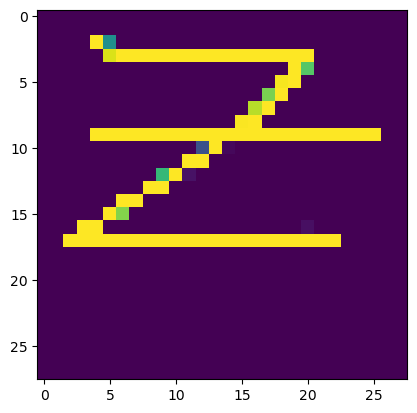

In [160]:
plt.imshow(X_train[3])
print(Y_train[3])

In [161]:
model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.Input(shape=(img_row, img_col, channel))),

#Adding data augmentation to the model
# model.add(data_augment)
# model.add(tf.keras.layers.RandomRotation(0.1)) # will have range of rotation [-1.6*2pi, 1.6*2pi] i.e. [10, 10] degrees
# model.add(tf.keras.layers.RandomZoom(0.1)) # random zoom of +-10% takes same value for width as well to have the same aspect ratio
# model.add(tf.keras.layers.RandomTranslation(0.1, 0.1))

model.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation='relu', input_shape = (img_row, img_col, channel), padding = "same"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))),
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation = "softmax"))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss="categorical_crossentropy", metrics=["accuracy"])

In [162]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 32)          25632     
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 32)          0         
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                  

In [163]:
epochs = 50
start_time = time.time()
# annealer = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, Y_train, 
                    epochs=epochs,
                    callbacks = [early_stop],
#                     validation_split = 0.2,
                    validation_data = (X_val, Y_val),
                    verbose = 1)
# history = model.fit(train_ds, 
#                     epochs=epochs,
#                     callbacks = [early_stop],
#                     validation_data=val_ds, # not trained on this data
#                     verbose = 1)

Epoch 1/50


2023-04-27 02:37:53.342550: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


268/268 [==============================] - 4s 7ms/step - loss: 2.1861 - accuracy: 0.4793 - val_loss: 1.1864 - val_accuracy: 0.7187
Epoch 2/50
268/268 [==============================] - 2s 6ms/step - loss: 0.9355 - accuracy: 0.7783 - val_loss: 0.7847 - val_accuracy: 0.8213
Epoch 3/50
268/268 [==============================] - 2s 6ms/step - loss: 0.6760 - accuracy: 0.8512 - val_loss: 0.5616 - val_accuracy: 0.8868
Epoch 4/50
268/268 [==============================] - 2s 7ms/step - loss: 0.5393 - accuracy: 0.8852 - val_loss: 0.5455 - val_accuracy: 0.8915
Epoch 5/50
268/268 [==============================] - 2s 6ms/step - loss: 0.4512 - accuracy: 0.9076 - val_loss: 0.4886 - val_accuracy: 0.8888
Epoch 6/50
268/268 [==============================] - 2s 6ms/step - loss: 0.4013 - accuracy: 0.9162 - val_loss: 0.4257 - val_accuracy: 0.9054
Epoch 7/50
268/268 [==============================] - 2s 6ms/step - loss: 0.3562 - accuracy: 0.9254 - val_loss: 0.3994 - val_accuracy: 0.9140
Epoch 8/50
268/26

In [164]:
model.save("/kaggle/working/model_1_inv.h5")
model.save_weights("/kaggle/working/model_1_inv_weights.h5")
# model.save("/kaggle/working/model_1_thresh.h5")
# model.save_weights("/kaggle/working/model_1_thresh_weights.h5")
# model.save("/kaggle/working/model_1.h5")
# model.save_weights("/kaggle/working/model_1_weights.h5")
# model.save("/kaggle/working/model_1_norm.h5")
# model.save_weights("/kaggle/working/model_1_norm_weights.h5")

In [165]:
model_2 = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Rescaling(1./255))
model_2.add(tf.keras.Input(shape=(img_row, img_col, channel))),

#Adding data augmentation to the model
# model.add(data_augment)
# model.add(tf.keras.layers.RandomRotation(0.1)) # will have range of rotation [-1.6*2pi, 1.6*2pi] i.e. [10, 10] degrees
# model.add(tf.keras.layers.RandomZoom(0.1)) # random zoom of +-10% takes same value for width as well to have the same aspect ratio
# model.add(tf.keras.layers.RandomTranslation(0.1, 0.1))

model_2.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation='relu', input_shape = (img_row, img_col, channel), padding = "same"))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_2.add(tf.keras.layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model_2.add(tf.keras.layers.Dropout(0.2))

model_2.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu'))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))

model_2.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))),
model_2.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_2.add(tf.keras.layers.Dense(50, activation='relu'))
model_2.add(tf.keras.layers.Dense(num_classes, activation = "softmax"))

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9)

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss="categorical_crossentropy", metrics=["accuracy"])

In [166]:
epochs = 50
start_time = time.time()
# annealer = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model_2.fit(X, Y, 
                    epochs=epochs,
                    callbacks = [early_stop],
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/50


2023-04-27 02:38:35.587413: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


252/252 [==============================] - 4s 7ms/step - loss: 2.1762 - accuracy: 0.4942 - val_loss: 15.1866 - val_accuracy: 0.1166
Epoch 2/50
252/252 [==============================] - 2s 6ms/step - loss: 0.9143 - accuracy: 0.8016 - val_loss: 18.4143 - val_accuracy: 0.1072
Epoch 3/50
252/252 [==============================] - 2s 8ms/step - loss: 0.6134 - accuracy: 0.8797 - val_loss: 19.6816 - val_accuracy: 0.1350
Epoch 4/50
252/252 [==============================] - 2s 7ms/step - loss: 0.4804 - accuracy: 0.9076 - val_loss: 20.7070 - val_accuracy: 0.1350
Epoch 5/50
252/252 [==============================] - 2s 7ms/step - loss: 0.3980 - accuracy: 0.9243 - val_loss: 21.4512 - val_accuracy: 0.1370
Epoch 6/50
252/252 [==============================] - 2s 6ms/step - loss: 0.3418 - accuracy: 0.9358 - val_loss: 19.9647 - val_accuracy: 0.1141
Epoch 7/50
252/252 [==============================] - 2s 6ms/step - loss: 0.2990 - accuracy: 0.9450 - val_loss: 22.1888 - val_accuracy: 0.1320
Epoch 8/50

In [167]:
model_2.save("/kaggle/working/model_2_inv.h5")
model_2.save_weights("/kaggle/working/model_2_inv_weights.h5")
# model_2.save("/kaggle/working/model_2_thresh.h5")
# model_2.save_weights("/kaggle/working/model_2_thresh_weights.h5")
# model_2.save("/kaggle/working/model_2.h5")
# model_2.save_weights("/kaggle/working/model_2_weights.h5")
# model_2.save("/kaggle/working/model_2_norm.h5")
# model_2.save_weights("/kaggle/working/model_2_norm_weights.h5")

In [367]:
model_2.evaluate(X_val, Y_val)

48/48 [==============================] - 0s 3ms/step - loss: 3.6949 - accuracy: 0.2899


[3.694902181625366, 0.28987425565719604]

In [368]:
model.evaluate(X_val,Y_val)

48/48 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.9265


[0.33297473192214966, 0.9265387058258057]

In [29]:
def plotplot(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plot = plt.figure(figsize=(15,10))
    plt.subplot(2, 2, 1)
    plt.plot(accuracy, label = "Training accuracy")
    plt.plot(val_accuracy, label="Validation accuracy")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs Epochs")

    plt.subplot(2,2,2)
    plt.plot(loss, label = "Training loss")
    plt.plot(val_loss, label="Validation loss")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss vs epochs")
    return plot

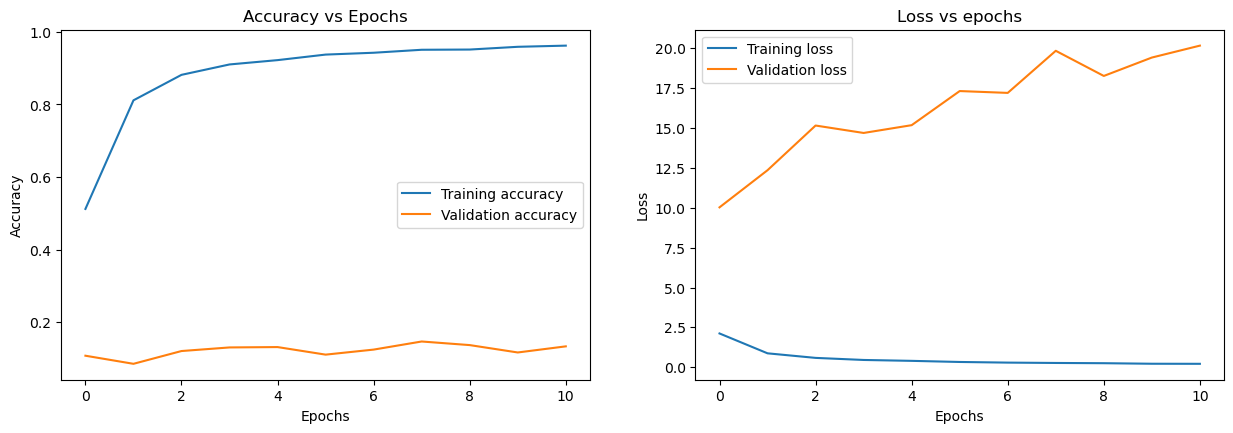

In [30]:
plot = plotplot(history)
plot.show()

In [31]:
test_dir = "/kaggle/input/test-basic-math/test/hand/"
list_img = os.listdir(test_dir)
list_img

['openbrac.png',
 '4.png',
 '5_comp.png',
 '9.png',
 'plus_hand.png',
 '1.png',
 '2.png',
 'closebrac.png',
 'slash.png',
 '7.png',
 'star.png',
 'plus.png',
 '5.png',
 '3.png',
 '8.png',
 'minus.png',
 '6.png',
 '4_comp.png',
 '0.png']

In [ ]:
def prediction(img):
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
#     img = cv2.imread(img)
    print(img.shape)
#     img = ~img
    img = cv2.resize(img,(img_row, img_col))
#     cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = np.expand_dims(img, 2)
#     print(plt.imshow(img, cmap = 'gray'))
    print(plt.imshow(img))
    print("image shape: ", img.shape)
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
#     norm_image=img/255
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    # print(case.shape)
#     print(case)
    pred = model.predict(case)[0]
    print(pred)
    # print(pred.argmax())
    print("Predicted label : ", label[pred.argmax()])
    # return ([i for i in labels if labels[i]==(pred[0])][0], pred)

In [168]:
model = tf.keras.models.load_model("/kaggle/working/model_2_inv.h5")

In [175]:
def prediction_2(img):
    x = get_image_2(img).reshape(img_row, img_col, channel).astype("float32")
    plt.imshow(x)
    plt.plot()
    x = np.array([x])
    print(x.shape)
    
    pred = model_3.predict(x)[0]
    print(pred)
    # print(pred.argmax())
    print("Predicted label : ", label[pred.argmax()])

img :  openbrac.png
(1, 28, 28, 1)
1/1 [==============================] - 0s 112ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted label :  6
img :  4.png
(1, 28, 28, 1)
1/1 [==============================] - 0s 28ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted label :  4
img :  5_comp.png
(1, 28, 28, 1)
1/1 [==============================] - 0s 28ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted label :  3
img :  9.png
(1, 28, 28, 1)
1/1 [==============================] - 0s 28ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted label :  *
img :  plus_hand.png
(1, 28, 28, 1)
1/1 [==============================] - 0s 28ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted label :  *
img :  1.png
(1, 28, 28, 1)
1/1 [==============================] - 0s 30ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Pred

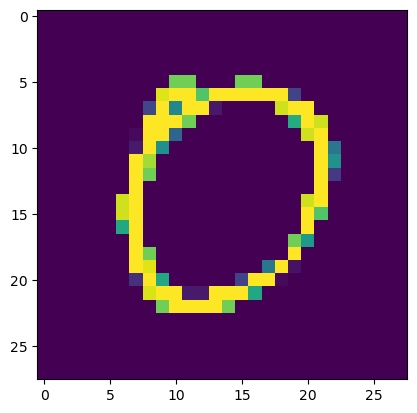

In [176]:
for img in list_img:
    print("img : ", img)
    prediction_2(test_dir + img)

In [36]:
data_dir_2 = "/kaggle/input/handwritten-digits-and-operators/CompleteImages/All data (Compressed)"

In [79]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_2,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
#     label_mode="categorical",
    color_mode='grayscale',
    image_size=(img_row, img_col),
    seed=123
)

Found 333895 files belonging to 16 classes.
Using 267116 files for training.


In [80]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_2,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
#     label_mode="categorical",
    color_mode='grayscale',
    image_size=(img_row, img_col),
    seed=123
)

Found 333895 files belonging to 16 classes.
Using 66779 files for validation.


In [39]:
class_names = train_ds.class_names
# num_classes = len(class_names)
print(class_names)

['%', '*', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '[', ']']


In [41]:
# # labels = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'add': 10, 'dec': 11, 'div': 12, 'eq': 13, 'mul': 14, 'sub': 15, 'x':16, 'y': 17, 'z': 18, '[': 19, ']': 20}

# # label = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'dec', 'div', 'eq', 'mul', 'sub', 'x', 'y', 'z', '[', ']']

# # cat_map = {'%': 12, '*': 14, '+': 10, '-': 15, '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '[': 19, ']': 20}
# cat_map = [12, 14, 10, 15, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 19, 20]
# tf_cat_map = tf.constant(np.array(cat_map))
# tf_cat_map


<tf.Tensor: shape=(16,), dtype=int64, numpy=array([12, 14, 10, 15,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 19, 20])>

In [81]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [42]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    print(labels_batch)
    break

(128, 28, 28, 1)
(128,)
tf.Tensor(
[11 11  3  1 15  7  9 11 15  7 14  9  0  4 13 12 12 12  3 13  1  1  5  5
 15  4  1  3 15 10 15 11  1  8  9 15  0  1  6  2  1 12 11  7  7  2  1  0
  4 11 10  3 14  3  5  8  4  7 14  2 11  2  2 15  6  2  4 14  8 11  7  9
  2 15  6  7  5  4  0  5 14  8  8  6  4 11 13 11 14 13 13  3  0 14  7  4
  2  7 13 13  7  8 12 15  1 10 12  9 12 12 14  5  2  4 11 14  7 11 15  7
 14  5  6  9  8  3 15 13], shape=(128,), dtype=int32)


In [129]:
def map_func(text, label):
    temp = tf.math.subtract(text, tf.constant(255.))
    temp = tf.math.multiply(temp, tf.constant(-1.))
    temp = tf.math.multiply(temp, tf.constant(1./255))
    temp = tf.abs(text)
    print(temp)
    print(label)
    lab = tf.one_hot(label, num_classes, name='label', axis=-1)
    print(lab)

    return temp, lab

In [128]:
train_ds = train_ds.map(map_func, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(map_func, num_parallel_calls=AUTOTUNE)

(128, 28, 28, 1)
(128, 21)
tf.Tensor([0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(21,), dtype=float32)
tf.Tensor(
[[[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [

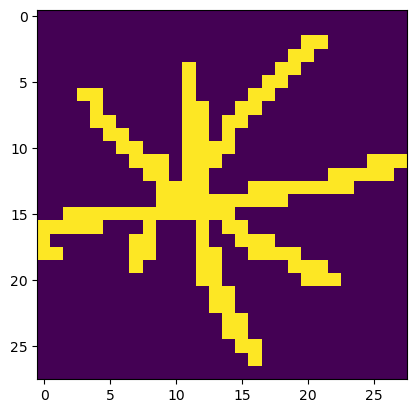

In [130]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    print(labels_batch[0])
    plt.imshow(image_batch[0])
    print(image_batch[0])
    break

In [171]:
model_3 = tf.keras.models.load_model("/kaggle/working/model_2_inv.h5")

In [173]:
epochs = 50
start_time = time.time()
# annealer = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model_3.fit(train_ds, 
                    epochs=epochs,
                    callbacks = [early_stop],
                    validation_data = val_ds,
                    verbose = 1)

Epoch 1/50


2023-04-27 02:43:18.736146: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2087/2087 [==============================] - 1210s 579ms/step - loss: 0.5156 - accuracy: 0.8844 - val_loss: 0.2252 - val_accuracy: 0.9498
Epoch 2/50
2087/2087 [==============================] - 15s 7ms/step - loss: 0.2163 - accuracy: 0.9465 - val_loss: 0.1620 - val_accuracy: 0.9621
Epoch 3/50
2087/2087 [==============================] - 14s 7ms/step - loss: 0.1723 - accuracy: 0.9564 - val_loss: 0.1345 - val_accuracy: 0.9683
Epoch 4/50
2087/2087 [==============================] - 16s 7ms/step - loss: 0.1458 - accuracy: 0.9625 - val_loss: 0.1202 - val_accuracy: 0.9707
Epoch 5/50
2087/2087 [==============================] - 16s 8ms/step - loss: 0.1295 - accuracy: 0.9661 - val_loss: 0.1080 - val_accuracy: 0.9731
Epoch 6/50
2087/2087 [==============================] - 16s 8ms/step - loss: 0.1168 - accuracy: 0.9691 - val_loss: 0.0971 - val_accuracy: 0.9762
Epoch 7/50
2087/2087 [==============================] - 15s 7ms/step - loss: 0.1074 - accuracy: 0.9716 - val_loss: 0.0955 - val_accuracy:

In [174]:
model_3.save("/kaggle/working/model_3_inv.h5")
model_3.save_weights("/kaggle/working/model_3_inv_weights.h5")